## Notas de aula de Álgebra Linear <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Espaços compostos
Para a descrição de sistemas constituídos por muitos graus de liberdade, precisaremos do conceito de espaços de Hilbert compostos. Para iniciar, consideremos dois espaços de Hilbert $\mathcal{H}_{a}$ e $\mathcal{H}_{b}$ com bases ortonormais respectivas $\{|a_{j}\rangle\}_{j=1}^{\dim \mathcal{H}_{a}}$ e $\{|b_{j}\rangle\}_{j=1}^{\dim \mathcal{H}_{b}}$. A composição desses dois espaços nos fornece um espaço de Hilbert "maior", denotado por
\begin{equation}
\mathcal{H}_{ab}=\mathcal{H}_{a}\otimes\mathcal{H}_{b}.
\end{equation}
Uma base para o espaço composto pode ser obtida através do produto tensorial (ou produto de Kronecker ou produto direto) dos vetores das bases individuais:
\begin{equation}
|c_{jk}\rangle:=|a_{j}\rangle\otimes|b_{k}\rangle,
\end{equation}
com $j=1,\cdots,\dim\mathcal{H}_{a}$ e $k=1,\cdots,\dim\mathcal{H}_{b}$. 

## Produto tensorial
O produto tensorial de duas matrizes $A\in\mathbb{C}^{m\mathrm{x}n}$ e $B\in\mathbb{C}^{p\mathrm{x}q}$ é uma matriz $A\otimes B\in\mathbb{C}^{mp\mathrm{x}nq}$ definida como:
\begin{equation}
A\otimes B := \begin{bmatrix}A_{1,1}B & A_{1,2}B & \cdots & A_{1,n}B \\ A_{2,1}B & A_{2,2}B & \cdots & A_{2,n}B \\ \vdots & \vdots & \cdots & \vdots \\ A_{m,1}B & A_{m,2}B & \cdots & A_{m,n}B \end{bmatrix}.
\end{equation}
Explicitamente
\begin{equation}
A\otimes B = \begin{bmatrix} 
A_{1,1}B_{1,1} & \cdots & A_{1,1}B_{1,q} & A_{1,2}B_{1,1} & \cdots  & A_{1,2}B_{1,q} & \cdots
\\ \vdots & \ddots & \vdots & \vdots & \ddots & \cdots & \cdots
\\ A_{1,1}B_{p,1} & \cdots & A_{1,1}B_{p,q} & A_{1,2}B_{p,1} & \cdots  & A_{1,2}B_{p,q} & \cdots
\\ A_{2,1}B_{1,1} & \cdots & A_{2,1}B_{1,q} & A_{2,2}B_{1,1} & \cdots  & A_{2,2}B_{1,q} & \cdots
\\ \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \cdots
\\ A_{2,1}B_{p,1} & \cdots & A_{2,1}B_{p,q} & A_{2,2}B_{p,1} & \cdots  & A_{2,2}B_{p,q} & \cdots
\\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}. 
\end{equation}

Abaixo exemplificamos o uso do Sympy pra o cálculo do produto tensorial.

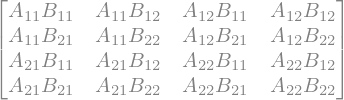

In [2]:
A11,A12,A21,A22 = symbols("A_{11} A_{12} A_{21} A_{22}")
B11,B12,B21,B22 = symbols('B_{11} B_{12} B_{21} B_{22}')
A = Matrix([[A11,A12],[A21,A22]]) 
B = Matrix([[B11,B12],[B21,B22]])
tp(A,B)

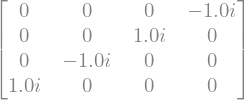

In [3]:
A = pauli(1); B = pauli(2); tp(A,B)

### Algumas propriedades do produto tensorial
* $(A\otimes B)^{\dagger}=A^{\dagger}\otimes B^{\dagger}$ <br>
Tomando a transposta conjugada da eq. acima para $A\otimes B$ obteremos
\begin{align}
(A\otimes B)^{\dagger} & = \begin{bmatrix} 
A_{1,1}^{*}B_{1,1}^{*} & \cdots & A_{1,1}^{*}B_{p,1}^{*} & A_{2,1}^{*}B_{1,1}^{*} & \cdots  & A_{2,1}^{*}B_{p,1}^{*} & \cdots
\\ \vdots & \ddots & \vdots & \vdots & \ddots & \cdots & \cdots
\\ A_{1,1}^{*}B_{1,q}^{*} & \cdots & A_{1,1}^{*}B_{p,q}^{*} & A_{2,1}^{*}B_{1,q}^{*} & \cdots  & A_{2,1}^{*}B_{p,q}^{*} & \cdots
\\ A_{1,2}^{*}B_{1,1}^{*} & \cdots & A_{1,2}^{*}B_{p,1}^{*} & A_{2,2}^{*}B_{1,1}^{*} & \cdots  & A_{2,2}^{*}B_{p,1}^{*} & \cdots
\\ \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \cdots
\\ A_{1,2}^{*}B_{1,q}^{*} & \cdots & A_{1,2}^{*}B_{p,q}^{*} & A_{2,2}^{*}B_{1,q}^{*} & \cdots  & A_{2,2}^{*}B_{p,q}^{*} & \cdots
\\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{bmatrix} \\
&= \begin{bmatrix} A_{1,1}^{*} & A_{2,1}^{*} & \cdots \\ A_{1,2}^{*} & A_{2,2}^{*} & \cdots \\ \vdots & \vdots & \ddots \end{bmatrix}\otimes\begin{bmatrix} B_{1,1}^{*} & \cdots & B_{p,1}^{*} \\ \vdots & \ddots & \vdots \\ B_{1,q}^{*} & \cdots & A_{p,q}^{*} \end{bmatrix} \\
& = A^{\dagger}\otimes B^{\dagger}.
\end{align}

* $(A\otimes B)(C\otimes D)=(AC)\otimes(BD)$ <br>
Vamos começar verificando que para quaisquer matrizes $A,B,C,D$, com dimensões apropriadas para que as multiplicações matriciais envolvidas possam ser realizadas, teremos
\begin{align}
(A\otimes B)(C\otimes D) & = \begin{bmatrix}A_{1,1}B & A_{1,2}B & \cdots \\ A_{2,1}B & A_{2,2}B & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \begin{bmatrix}C_{1,1}D & C_{1,2}D & \cdots \\ C_{2,1}D & C_{2,2}D & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}BC_{1,1}D+A_{1,2}BC_{2,1}D+\cdots) & (A_{1,1}BC_{1,2}D+A_{1,2}BC_{2,2}D+\cdots)& \cdots \\ (A_{2,1}BC_{1,1}D+A_{2,2}BC_{2,1}D+\cdots) & (A_{2,1}BC_{1,2}D+A_{2,2}BC_{2,2}D+\cdots) & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}C_{1,1}+A_{1,2}C_{2,1}+\cdots)BD & (A_{1,1}C_{1,2}+A_{1,2}C_{2,2}+\cdots)BD & \cdots \\ (A_{2,1}C_{1,1}+A_{2,2}C_{2,1}+\cdots)BD & (A_{2,1}C_{1,2}+A_{2,2}C_{2,2}+\cdots)BD & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}C_{1,1}+A_{1,2}C_{2,1}+\cdots) & (A_{1,1}C_{1,2}+A_{1,2}C_{2,2}+\cdots) & \cdots \\ (A_{2,1}C_{1,1}+A_{2,2}C_{2,1}+\cdots) & (A_{2,1}C_{1,2}+A_{2,2}C_{2,2}+\cdots) & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix}\otimes BD \\
& = AC\otimes BD.
\end{align}

* $Tr(A\otimes B)=Tr(A)Tr(B)$. <br>
Sejam $\{|a_{j}\rangle\}\in\mathcal{H_{a}}$ e $\{|b_{k}\rangle\}\in\mathcal{H_{b}}$ duas bases. Então, usando a propriedade acima, vemos que
\begin{align}
Tr(A\otimes B) &= \sum_{j,k}(\langle a_{j}|\otimes\langle b_{k}|)(A\otimes B)(|a_{j}\rangle\otimes|b_{k}\rangle) = \sum_{j,k}(\langle a_{j}|\otimes\langle b_{k}|)(A|a_{j}\rangle\otimes B|b_{k}\rangle) \\
&= \sum_{j,k}\langle a_{j}|A|a_{j}\rangle\otimes\langle b_{k}|B|b_{k}\rangle = \sum_{j}\langle a_{j}|A|a_{j}\rangle\otimes\sum_{k}\langle b_{k}|B|b_{k}\rangle \\
& = Tr(A)\otimes Tr(B) = Tr(A)Tr(B).
\end{align}

* $|a\rangle\otimes\langle b| = |a\rangle\langle b|$ <br>
Para quaisquer dois vetores $|a\rangle,|b\rangle\in\mathbb{C}^{n}$, teremos
\begin{align}
& |a\rangle\otimes\langle b| = \begin{bmatrix}a_{1}\\a_{2}\\\vdots\\a_{n}\end{bmatrix}\otimes\begin{bmatrix}b_{1}^{*}&b_{2}^{*}&\cdots&b_{n}^{*}\end{bmatrix} = \begin{bmatrix}a_{1}\begin{bmatrix}b_{1}^{*}&b_{2}^{*}&\cdots&b_{n}^{*}\end{bmatrix}\\a_{2}\begin{bmatrix}b_{1}^{*}&b_{2}^{*}&\cdots&b_{n}^{*}\end{bmatrix}\\\vdots\\a_{n}\begin{bmatrix}b_{1}^{*}&b_{2}^{*}&\cdots&b_{n}^{*}\end{bmatrix}\end{bmatrix} = \begin{bmatrix}a_{1}b_{1}^{*}&a_{1}b_{2}^{*}&\cdots&a_{1}b_{n}^{*} \\ a_{2}b_{1}^{*}&a_{2}b_{2}^{*}&\cdots&a_{2}b_{n}^{*} \\ \vdots&\vdots&\cdots&\vdots \\ a_{n}b_{1}^{*}&a_{n}b_{2}^{*}&\cdots&a_{n}b_{n}^{*} \end{bmatrix}, \\
& |a\rangle\langle b| =\begin{bmatrix}a_{1}\\a_{2}\\\vdots\\a_{n}\end{bmatrix}\begin{bmatrix}b_{1}^{*}&b_{2}^{*}&\cdots&b_{n}^{*}\end{bmatrix} = \begin{bmatrix}a_{1}b_{1}^{*}&a_{1}b_{2}^{*}&\cdots&a_{1}b_{n}^{*} \\ a_{2}b_{1}^{*}&a_{2}b_{2}^{*}&\cdots&a_{2}b_{n}^{*} \\ \vdots&\vdots&\cdots&\vdots \\ a_{n}b_{1}^{*}&a_{n}b_{2}^{*}&\cdots&a_{n}b_{n}^{*} \end{bmatrix}.
\end{align}

## Construíndo bases compostas a partir de bases lindividuais
Vemos que o produto interno de dois elemento da "base composta", $|c_{lm}\rangle=|a_{l}\rangle\otimes|b_{m}\rangle$, é dado por:
\begin{align}
\langle c_{jk}|c_{lm}\rangle &= (\langle a_{j}|\otimes\langle b_{k}|)(|a_{l}\rangle\otimes|b_{m}\rangle) = \langle a_{j}|a_{l}\rangle\otimes\langle b_{k}|b_{m}\rangle = \delta_{j,l}\otimes\delta_{k,m} \\
&= \delta_{j,l}\delta_{k,m}.
\end{align}
Por conseguinte, como os elementos de $\{|a_{j}\rangle\otimes|b_{k}\rangle\}$ são ortogonais com relação aos dois índices correspondentes, e assim
\begin{equation}
d_{ab}\equiv\dim\mathcal{H}_{ab} = d_{a}d_{b}.
\end{equation}

##### Exemplo
Vamos considerar a base padrão para $\mathbb{C}^{2}$
\begin{equation}
|a_{1}\rangle=\begin{bmatrix}1\\0\end{bmatrix}\text{, }|a_{2}\rangle=\begin{bmatrix}0\\1\end{bmatrix}.
\end{equation}
Uma base para $\mathbb{C}^{4}=\mathbb{C}^{2}\otimes\mathbb{C}^{2}$ é obtida como segue:
\begin{align}
& |c_{11}\rangle=|a_{1}\rangle\otimes|a_{1}\rangle=\begin{bmatrix}1|a_{1}\rangle\\0|a_{1}\rangle\end{bmatrix}=\begin{bmatrix}1\\0\\0\\0\end{bmatrix}, \\
& |c_{12}\rangle=|a_{1}\rangle\otimes|a_{2}\rangle=\begin{bmatrix}1|a_{2}\rangle\\0|a_{2}\rangle\end{bmatrix}=\begin{bmatrix}0\\1\\0\\0\end{bmatrix}, \\
& |c_{21}\rangle=|a_{2}\rangle\otimes|a_{1}\rangle=\begin{bmatrix}0|a_{1}\rangle\\1|a_{1}\rangle\end{bmatrix}=\begin{bmatrix}0\\0\\1\\0\end{bmatrix}, \\
& |c_{22}\rangle=|a_{2}\rangle\otimes|a_{2}\rangle=\begin{bmatrix}0|a_{2}\rangle\\1|a_{2}\rangle\end{bmatrix}=\begin{bmatrix}0\\0\\0\\1\end{bmatrix}. \\
\end{align}
Claro, $\dim\mathbb{C}^{4}=(\dim\mathbb{C}^{2})(\dim\mathbb{C}^{2})=(2)(2)=4$.

# Representação produto externo
## Representação produto externo para um espaço simples
Considere um operador linear $A:\mathbb{C}^{n}\rightarrow\mathbb{C}^{n}$ e uma base ortonormal $|\beta_{j}\rangle\in\mathbb{C}^{n}$. Podemos escrever a representação produto externo de $A$ da seguinte forma:
\begin{align}
A &= \mathbb{I}_{\mathbb{C}^{n}}A\mathbb{I}_{\mathbb{C}^{n}} = \sum_{j=1}^{n}|\beta_{j}\rangle\langle\beta_{j}|A\sum_{k=1}^{n}|\beta_{k}\rangle\langle\beta_{k}| \\
&= \sum_{j,k=1}^{n}\langle\beta_{j}|A|\beta_{k}\rangle|\beta_{j}\rangle\langle\beta_{k}|.
\end{align}
_OBS:_ Cada termo do tipo $|\beta_{j}\rangle\langle\beta_{k}|$ é chamado de __produto externo__, e é uma matriz $n\mathrm{x}n$. Note que o projetor em $\mathbb{C}^{n}$ também é um produto externo, mas nesse caso temos um único vetor envolvido. Ademais, $A_{j,k}:=\langle\beta_{j}|A|\beta_{k}\rangle$ são os elementos de matrix de $A$ quando representado na base $\{|\beta_{k}\rangle\}$.

##### Exemplo
Consideremos o operador $A:\mathbb{C}^{2}\rightarrow\mathbb{C}^{2}$ e $\{|e_{1}\rangle,|e_{2}\rangle\}$ uma base ortonormal de $\mathbb{C}^{2}$. Para a definição $A|e_{1}\rangle=|e_{1}\rangle$ e $A|e_{2}\rangle=|e_{2}\rangle$ teremos a seguinte representação produto externo
\begin{align}
A &= \sum_{j,k}\langle e_{j}|A|e_{k}\rangle|e_{j}\rangle\langle e_{k}| \\
&= \langle e_{1}|A|e_{1}\rangle|e_{1}\rangle\langle e_{1}| + \langle e_{1}|A|e_{2}\rangle|e_{1}\rangle\langle e_{2}| + \langle e_{2}|A|e_{1}\rangle|e_{2}\rangle\langle e_{1}| + \langle e_{2}|A|e_{2}\rangle|e_{2}\rangle\langle e_{2}| \\
&= \langle e_{1}|e_{1}\rangle|e_{1}\rangle\langle e_{1}| + \langle e_{1}|e_{2}\rangle|e_{1}\rangle\langle e_{2}| + \langle e_{2}|e_{1}\rangle|e_{2}\rangle\langle e_{1}| + \langle e_{2}|e_{2}\rangle|e_{2}\rangle\langle e_{2}| \\
&= 1|e_{1}\rangle\langle e_{1}| + 0|e_{1}\rangle\langle e_{2}| + 0|e_{2}\rangle\langle e_{1}| + 1|e_{2}\rangle\langle e_{2}| \\
&= |e_{1}\rangle\langle e_{1}| + |e_{2}\rangle\langle e_{2}|.
\end{align}

## Representação produto externo para um espaço composto
Consideremos agora o espaço composto $\mathbb{C}^{n}\otimes\mathbb{C}^{m}$, um operador linear $C$ neste espaço e duas bases ortonormais dos espaços individuais $\{|\alpha_{j}\rangle\}_{j=1}^{n}$ e $\{|\beta_{k}\rangle\}_{k=1}^{m}$. Analogamente ao que fizemos acima, podemos escrever a seguinte representação produto externo para $C$:
\begin{align}
C &=(\mathbb{I}_{\mathbb{C}^{n}}\otimes\mathbb{I}_{\mathbb{C}^{m}})C(\mathbb{I}_{\mathbb{C}^{n}}\otimes\mathbb{I}_{\mathbb{C}^{m}}) \\
&= \left(\sum_{j}|\alpha_{j}\rangle\langle\alpha_{j}|\otimes\sum_{k}|\beta_{k}\rangle\langle\beta_{k}|\right)C\left(\sum_{p}|\alpha_{p}\rangle\langle\alpha_{p}|\otimes\sum_{q}|\beta_{q}\rangle\langle\beta_{q}|\right) \\
&= \sum_{j,k,p,q}(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{j}|\otimes\langle\beta_{k}|)C(|\alpha_{p}\rangle\otimes|\beta_{q}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|) \\
&= \sum_{j,k,p,q}(\langle\alpha_{j}|\otimes\langle\beta_{k}|)C(|\alpha_{p}\rangle\otimes|\beta_{q}\rangle)(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|) \\
&= \sum_{j,k,p,q}C_{j,k}^{p,q}(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|) \\
&= \sum_{j,k,p,q}C_{j,k}^{p,q}(|\alpha_{j}\rangle\langle\alpha_{p}|\otimes|\beta_{k}\rangle\langle\beta_{q}|),
\end{align}
com
\begin{equation}
C_{j,k}^{p,q} := (\langle\alpha_{j}|\otimes\langle\beta_{k}|)C(|\alpha_{p}\rangle\otimes|\beta_{q}\rangle).
\end{equation}

##### Exemplo
Consideremos um operador $C:\mathbb{C}^{2}\otimes\mathbb{C}^{2}\rightarrow\mathbb{C}^{2}\otimes\mathbb{C}^{2}$ definido por
\begin{align}
& C(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) := |\alpha_{1}\rangle\otimes|\beta_{1}\rangle \text{, } C(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) := |\alpha_{1}\rangle\otimes|\beta_{2}\rangle, \\
& C(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) := |\alpha_{2}\rangle\otimes|\beta_{2}\rangle \text{, } C(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) := |\alpha_{2}\rangle\otimes|\beta_{1}\rangle.
\end{align}
A representação matricial desse operador é
\begin{align}
C &\doteq 
\begin{bmatrix} C_{1,1}^{1,1} & C_{1,1}^{1,2} & C_{1,1}^{2,1} & C_{1,1}^{2,2} \\
C_{1,2}^{1,1} & C_{1,2}^{1,2} & C_{1,2}^{2,1} & C_{1,2}^{2,2} \\
C_{2,1}^{1,1} & C_{2,1}^{1,2} & C_{2,1}^{2,1} & C_{2,1}^{2,2} \\
C_{2,2}^{1,1} & C_{2,2}^{1,2} & C_{2,2}^{2,1} & C_{2,2}^{2,2} 
\end{bmatrix} \\
& = \begin{bmatrix} 
(\langle\alpha_{1}|\otimes\langle\beta_{1}|)C(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)C(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)C(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)C(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) 
\\ (\langle\alpha_{1}|\otimes\langle\beta_{2}|)C(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)C(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)C(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)C(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) 
\\ (\langle\alpha_{2}|\otimes\langle\beta_{1}|)C(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)C(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)C(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)C(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) 
\\ (\langle\alpha_{2}|\otimes\langle\beta_{2}|)C(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)C(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)C(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)C(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) 
\end{bmatrix} \\
& = \begin{bmatrix} 
(\langle\alpha_{1}|\otimes\langle\beta_{1}|)(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{1}|)(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) 
\\ (\langle\alpha_{1}|\otimes\langle\beta_{2}|)(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{1}|\otimes\langle\beta_{2}|)(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) 
\\ (\langle\alpha_{2}|\otimes\langle\beta_{1}|)(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{1}|)(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) 
\\ (\langle\alpha_{2}|\otimes\langle\beta_{2}|)(|\alpha_{1}\rangle\otimes|\beta_{1}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)(|\alpha_{1}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)(|\alpha_{2}\rangle\otimes|\beta_{2}\rangle) & (\langle\alpha_{2}|\otimes\langle\beta_{2}|)(|\alpha_{2}\rangle\otimes|\beta_{1}\rangle) 
\end{bmatrix} \\
& = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}.
\end{align}
Como os únicos elementos de matriz não nulos são $C_{1,1}^{1,1}=C_{1,2}^{1,2}=C_{2,1}^{2,2}=C_{2,2}^{2,1}=1$, a representação produto externo desse operador é
\begin{align}
C &= (|\alpha_{1}\rangle\otimes|\beta_{1}\rangle)(\langle\alpha_{1}|\otimes\langle\beta_{1}|) + (|\alpha_{1}\rangle\otimes|\beta_{2}\rangle)(\langle\alpha_{1}|\otimes\langle\beta_{2}|) \\ 
& \hspace{0.5cm} + (|\alpha_{2}\rangle\otimes|\beta_{1}\rangle)(\langle\alpha_{2}|\otimes\langle\beta_{2}|) + (|\alpha_{2}\rangle\otimes|\beta_{2}\rangle)(\langle\alpha_{2}|\otimes\langle\beta_{1}|).
\end{align}

# Traço parcial
Vimos que a função traço de um operador linear $B:\mathcal{H}_{b}\rightarrow\mathcal{H}_{b}$ podia ser escrita como 
\begin{equation}
Tr(B)=\sum_{j=1}^{d_{b}}\langle\beta_{j}|B|\beta_{j}\rangle,
\end{equation}
com $\{|\beta_{j}\rangle\}_{j=1}^{d_{b}}$ sendo uma base qualquer de $\mathcal{H}_{b}$ e $d_{b}=\dim\mathcal{H}_{b}$. Consideremos um operador linear atuando no espaço composto: $C:\mathcal{H}_{a}\otimes\mathcal{H}_{b}\rightarrow\mathcal{H}_{a}\otimes\mathcal{H}_{b}$. A função traço parcial $Tr_{b}$ é uma função que leva operadores lineares definidos em $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ em operadores lineares definidos em $\mathcal{H}_{a}$ e é definida por (https://arxiv.org/abs/1601.07458):
\begin{equation}
Tr_{b}(C) := \sum_{l=1}^{d_{b}}(\mathbb{I}_{a}\otimes\langle\beta_{l}|)C(\mathbb{I}_{a}\otimes|\beta_{l}\rangle).
\end{equation}
Analogamente, o traço parcial sobre $\mathcal{H}_{a}$ é definido como $Tr_{a}(C) := \sum_{l=1}^{d_{a}}(\langle\alpha_{l}|\otimes\mathbb{I}_{b})C(|\alpha_{l}\rangle\otimes\mathbb{I}_{b})$. Ademais, usamos $\mathbb{I}_{a}=\mathbb{I}_{\mathcal{H}_{a}}$.

Se aplicamos essa definição no operador $C$, escrito na representação produto externo, obteremos
\begin{align}
\mathrm{Tr}_{b}(C) & = \sum_{l=1}^{d_{b}}(\mathbb{I}_{a}\otimes\langle\beta_{l}|)\left(\sum_{j,p=1}^{d_{a}}\sum_{k,q=1}^{d_{b}}C_{j,k}^{p,q}(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|)\right)(\mathbb{I}_{a}\otimes|\beta_{l}\rangle) \\
& = \sum_{l=1}^{d_{b}}\sum_{j,p=1}^{d_{a}}\sum_{k,q=1}^{d_{b}}C_{j,k}^{p,q}(\mathbb{I}_{a}|\alpha_{j}\rangle\otimes\langle\beta_{l}|\beta_{k}\rangle)(\langle\alpha_{p}|\mathbb{I}_{a}\otimes\langle\beta_{q}|\beta_{l}\rangle) \\
& = \sum_{l=1}^{d_{b}}\sum_{j,p=1}^{d_{a}}\sum_{k,q=1}^{d_{b}}C_{j,k}^{p,q}(|\alpha_{j}\rangle\otimes\delta_{l,k})(\langle\alpha_{p}|\otimes\delta_{q,l}) = \sum_{j,p=1}^{d_{a}}\left(\sum_{l=1}^{d_{b}}C_{j,l}^{p,l}\right)(|\alpha_{j}\rangle\langle\alpha_{p}|\otimes1) \\
& = \sum_{j,p=1}^{d_{a}}C^{a}_{j,p}|\alpha_{j}\rangle\langle\alpha_{p}| =: C^{a}.
\end{align}
Ou seja, $\mathrm{Tr}_{b}$ leva operadores definidos em $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ em operadores de $\mathcal{H}_{a}$, com os elementos de matriz desse operador reduzido sendo
\begin{equation}
C^{a}_{j,p}=\sum_{l=1}^{d_{b}}C_{j,l}^{p,l}.
\end{equation}

##### Exemplo
Seja $\{|e_{1}\rangle,|e_{2}\rangle\}\in\mathbb{C}^{2}$ uma base ortonormal. Consideremos o projetor no vetor $|\Psi_{-}\rangle=2^{-1/2}\left(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle\right)$ (chamado de estado singleto):
\begin{align}
P_{\Psi_{-}} &=|\Psi_{-}\rangle\langle\Psi_{-}| = |\Psi_{-}\rangle|\Psi_{-}\rangle^{\dagger}\\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)^{\dagger} \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)((|e_{1}\rangle\otimes|e_{2}\rangle)^{\dagger}-(|e_{2}\rangle\otimes|e_{1}\rangle)^{\dagger}) \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)((|e_{1}\rangle)^{\dagger}\otimes(|e_{2}\rangle)^{\dagger}-(|e_{2}\rangle)^{\dagger}\otimes(|e_{1}\rangle)^{\dagger}) \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)(\langle e_{1}|\otimes\langle e_{2}|-\langle e_{2}|\otimes\langle e_{1}|) \\
& = 2^{-1}(|e_{1}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{2}| - |e_{1}\rangle\langle e_{2}|\otimes|e_{2}\rangle\langle e_{1}|  - |e_{2}\rangle\langle e_{1}|\otimes|e_{1}\rangle\langle e_{2}| + |e_{2}\rangle\langle e_{2}|\otimes|e_{1}\rangle\langle e_{1}|).
\end{align}

Tomando o traço parcial sobre $\mathcal{H}_{b}$,
\begin{align}
\mathrm{Tr}_{b}(P_{\Psi_{-}}) & = \sum_{j=1}^{2}(\mathbb{I}_{e}\otimes\langle e_{j}|)P_{\Psi}(\mathbb{I}_{e}\otimes|e_{j}\rangle) \\
& = (\mathbb{I}_{a}\otimes\langle e_{1}|)P_{\Psi}(\mathbb{I}_{a}\otimes|e_{1}\rangle) + (\mathbb{I}_{a}\otimes\langle e_{2}|)P_{\Psi}(\mathbb{I}_{a}\otimes|e_{2}\rangle) \\
& = 2^{-1}(\mathbb{I}_{a}|e_{1}\rangle\langle e_{1}|\mathbb{I}_{a}\otimes\langle e_{1}|e_{2}\rangle\langle e_{2}|e_{1}\rangle - \mathbb{I}_{a}|e_{1}\rangle\langle e_{2}|\mathbb{I}_{a}\otimes\langle e_{1}|e_{2}\rangle\langle e_{1}|e_{1}\rangle  \\
& \hspace{0.5cm} - \mathbb{I}_{a}|e_{2}\rangle\langle e_{1}|\mathbb{I}_{a}\otimes\langle e_{1}|e_{1}\rangle\langle e_{2}|e_{1}\rangle + \mathbb{I}_{a}|e_{2}\rangle\langle e_{2}|\mathbb{I}_{a}\otimes\langle e_{1}|e_{1}\rangle\langle e_{1}|e_{1}\rangle) \\
& \hspace{0.5cm} + 2^{-1}(\mathbb{I}_{a}|e_{1}\rangle\langle e_{1}|\mathbb{I}_{a}\otimes\langle e_{2}|e_{2}\rangle\langle e_{2}|e_{2}\rangle - \mathbb{I}_{a}|e_{1}\rangle\langle e_{2}|\mathbb{I}_{a}\otimes\langle e_{2}|e_{2}\rangle\langle e_{1}|e_{2}\rangle  \\
& \hspace{0.5cm} - \mathbb{I}_{a}|e_{2}\rangle\langle e_{1}|\mathbb{I}_{a}\otimes\langle e_{2}|e_{1}\rangle\langle e_{2}|e_{2}\rangle + \mathbb{I}_{a}|e_{2}\rangle\langle e_{2}|\mathbb{I}_{a}\otimes\langle e_{2}|e_{1}\rangle\langle e_{1}|e_{2}\rangle) \\
& = 2^{-1}(|e_{2}\rangle\langle e_{2}|+|e_{1}\rangle\langle e_{1}|) = 2^{-1}\mathbb{I}_{\mathbb{C}^{2}}.
\end{align}

Conforme vimos quando discutimos a entropia de von Neumann, teremos 
\begin{equation}
S_{vn}(P_{\Psi_{-}})=0
\end{equation}
e
\begin{equation}
S_{vn}(\mathrm{Tr}_{b}(P_{\Psi_{-}}))=S_{vn}(2^{-1}\mathbb{I}_{\mathbb{C}^{2}})=\log_{2}(2)=1.
\end{equation}

Abaixo são fornecidas funções que retornam o traço parcial sobre uma da partes de um espaço composto bipartido.

In [4]:
def ptrace(da, db, C, ssys):
    if ssys == 'a':
        ptr = zeros(db,db)
        for j in range(0, db):
            for k in range(0, db):
                for l in range(0, da):
                    ptr[j,k] += C[l*db+j,l*db+k]
    elif ssys == 'b':
        ptr = zeros(da,da)
        for j in range(0, da):
            for k in range(0, da):
                for l in range(0, db):
                    ptr[j,k] += C[j*db+l,k*db+l]
    return ptr

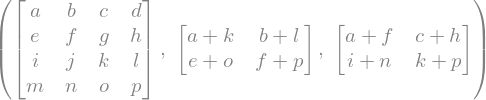

In [5]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')
C = Matrix([[a,b,c,d],[e,f,g,h],[i,j,k,l],[m,n,o,p]])
A = ptrace(2,2,C,'a'); B = ptrace(2,2,C,'b'); C, A, B

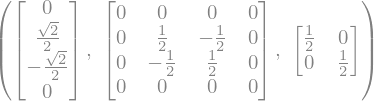

In [6]:
Psim = Matrix([[0],[1/sqrt(2)],[-1/sqrt(2)],[0]]); 
P_Psim = proj(Psim); rhoB = ptrace(2, 2, P_Psim, 'a')
Psim, P_Psim, rhoB

---
# Teorema (decomposição polar)
Para uma matriz qualquer $A$, podemos escrever
\begin{equation}
A=UJ=KV,
\end{equation}
com $U$ e $V$ sendo matrizes unitárias e $J=\sqrt{A^{\dagger}A}$ e $K=\sqrt{AA^{\dagger}}$ são matrizes positivas. Além disso, se existir a inversa de $A$, então $U=AJ^{-1}$ e $V=K^{-1}A$.

## Prova
Vamos começar provando a decomposição polar esquerda $A=UJ$. Assumiremos essa igualdade e provaremos que a ação desses operadores é a mesma. Essa igualdade implica que
\begin{equation}
A^{\dagger}A=(UJ)^{\dagger}(UJ)=J^{\dagger}U^{\dagger}UJ=J^{2}.
\end{equation}
Como $J$ é positiva, é Hermitiana e assim podemos escrever a decomposição espectral 
\begin{equation}
J=\sum_{j}\lambda_{j}|j\rangle\langle j| \text{ com } \lambda_{j}\ge 0\ \forall j \text{, } \langle j|j'\rangle=\delta_{j,j'} \text{ e } \sum_{j}|j\rangle\langle j|=\mathbb{I}.
\end{equation}
Vamos definir a ação de $A$ nos autovetores de $J$ como segue:
\begin{equation}
A|j\rangle=:|\psi_{j}\rangle.
\end{equation}
Assim
\begin{align}
(|\psi_{j}\rangle,|\psi_{k}\rangle) & = (A|j\rangle,A|k\rangle) = (A^{\dagger}A|j\rangle,|k\rangle) = (J^{2}|j\rangle,|k\rangle) \\ 
& = (\lambda_{j}^{2}|j\rangle,|k\rangle) = \lambda_{j}^{2}(|j\rangle,|k\rangle) \\
& = \lambda_{j}^{2}\delta_{j,k}.
\end{align}
Então, para $\lambda_{j}>0$ podemos definir o seguinte conjunto ortonormal de vetores:
\begin{equation}
|e_{j}\rangle := \frac{|\psi_{j}\rangle}{||\psi_{j}||} = \frac{|\psi_{j}\rangle}{\sqrt{\langle\psi_{j}|\psi_{j}\rangle}}=\frac{|\psi_{j}\rangle}{\lambda_{j}}.
\end{equation}
Podemos aplicar o procedimento de Gram-Schmidt para completar a base ortonormal $|e_{j}\rangle$ usando vetores LI no subespaço gerado pelo autovetores de $J$ correspondentes a $\lambda_{j}=0$. Tendo essa base, definimos o operador unitário de mudança de base
\begin{equation}
U:=\sum_{j}|e_{j}\rangle\langle j|.
\end{equation}

Agora, para a ação dos operadores, teremos
\begin{align}
& \lambda_{j}>0: \\
& UJ|j\rangle = \sum_{k}|e_{k}\rangle\langle k|\lambda_{j}|j\rangle = \lambda_{j}\sum_{k}|e_{k}\rangle\langle k|j\rangle = \lambda_{j}|e_{j}\rangle = |\psi_{j}\rangle. \\
& \lambda_{j}=0: \\
& UJ|j\rangle = U\lambda_{j}|j\rangle = U0|j\rangle  = |\oslash\rangle = |\psi_{j}\rangle, \\
\end{align}
pois $\langle\psi_{j}|\psi_{j}\rangle=\lambda_{j}^{2}=0\Rightarrow|\psi_{j}\rangle=|\oslash\rangle$. 

Usando a decomposição polar esquerda aplicada a $A^{\dagger}$, pode-se provar também a decomposição polar direita $A=KV$.

### Forma de $U$ quando $\det(A)\ne 0$
Se $\det(A)\ne 0$, existe $A^{-1}$. Isso implica que existe $J^{-1}$ pois 
\begin{equation}
\det(A)=\det(UJ)=\det(U)\det(J) \therefore \det(J)\ne 0.
\end{equation}
Ademais, também existe $K^{-1}$ pois 
\begin{equation}
\det(A)=\det(KV)=\det(K)\det(V) \therefore \det(K)\ne 0.
\end{equation}
Então, de $A=UJ=KV$ teremos 
\begin{align}
& AJ^{-1} = UJJ^{-1} = U, \\
& K^{-1}A = K^{-1}KV = V.
\end{align}
Concluímos assim a prova do teorema. $\hspace{2cm}\square$

# Teorema (decomposição em valores singulares)
Para qualquer matriz $A$, existem matrizes unitárias $U$ e $W$ e uma matriz $D$ positiva e diagonal na base padrão $\{|c_{j}\rangle\}$ tais que
\begin{equation}
A = UDW.
\end{equation}

## Prova
Pela decomposição polar esquerda, temos que $A=SJ$ com $J=\sqrt{A^{\dagger}A}$ e $S^{\dagger}=S^{-1}$. Usamos uma matriz unitária $W$ que leva os autovetores de $J=\sum_{j}\lambda_{j}|j\rangle\langle j|$ em vetores da base padrão $\{|c_{j}\rangle\}$, i.e., 
\begin{equation}
W=\sum_{j}|c_{j}\rangle\langle j|\Rightarrow W|j\rangle=|c_{j}\rangle.
\end{equation}
Com isso, podemos escrever
\begin{equation}
D:=WJW^{\dagger}=\sum_{j}\lambda_{j}W|j\rangle\langle j|W^{\dagger}=:\sum_{j}\lambda_{j}|c_{j}\rangle\langle c_{j}|.
\end{equation}
Assim $W^{\dagger}DW=W^{\dagger}WJW^{\dagger}W=J$ e
\begin{equation}
A=SJ=SW^{\dagger}DW=:UDW,
\end{equation}
completando assim a prova do teorema. $\hspace{2cm}\square$

# Teorema (decomposição de Schmidt)
Consideremos um vetor qualquer $|\Psi\rangle$ de $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ decomposto em uma base composta ortonormal:
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\dim\mathcal{H}_{a}}\sum_{k=1}^{\dim\mathcal{H}_{b}}c_{j,k}|\alpha_{j}\rangle\otimes|\beta_{k}\rangle,
\end{equation}
Existem bases ortonormais dos espaços individuais $\{|\tilde{\alpha}_{j}\rangle\}$ e $\{|\tilde{\beta}_{j}\rangle\}$ tais que
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\min(\dim\mathcal{H}_{a},\dim\mathcal{H}_{b})}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle,
\end{equation}
em que $d_{j}$ são os chamados coeficientes de Schmidt.

## Prova
Usamos a decomposição em valores singulares para escrever a matriz de coeficientes $C=(c_{j,k})$ como segue:
\begin{align}
c_{j,k}&=(UDV)_{j,k}=\sum_{l}(UD)_{j,l}V_{l,k}=\sum_{l,m}U_{j,m}D_{m,l}V_{l,k} \\
&=:\sum_{l,m}U_{j,m}d_{l}\delta_{l,m}V_{l,k}=\sum_{l}U_{j,l}d_{l}V_{l,k}.
\end{align}
Assim
\begin{align}
|\Psi\rangle &= \sum_{j,k}\sum_{l}U_{j,l}d_{l}V_{l,k}|\alpha_{j}\rangle\otimes|\beta_{k}\rangle = \sum_{l}d_{l}\sum_{j}U_{j,l}|\alpha_{j}\rangle\otimes\sum_{k}V_{l,k}|\beta_{k}\rangle \\
& =: \sum_{l}d_{l}|\tilde{\alpha}_{l}\rangle\otimes|\tilde{\beta}_{l}\rangle.
\end{align} 
Vamos verificar a ortonormalidade das bases que definimos:
\begin{align}
\langle\tilde{\alpha}_{j}|\tilde{\alpha}_{k}\rangle &  = \left(\sum_{p}U_{p,j}|\alpha_{p}\rangle,\sum_{q}U_{q,k}|\alpha_{q}\rangle\right) \\
& = \sum_{p,q}U_{p,j}^{*}U_{q,k}\langle\alpha_{p}|\alpha_{q}\rangle = \sum_{p,q}U_{p,j}^{*}U_{q,k}\delta_{p,q} \\ 
& = \sum_{p}(U^{\dagger})_{j,p}U_{p,k} = (U^{\dagger}U)_{j,k}=\delta_{j,k}.
\end{align}
Da mesma forma, pode-se verificar a ortonormalidade da base $\{|\tilde{\beta}_{k}\rangle\}$.

Com isso completamos a prova do teorema. $\hspace{2cm}\square$

## Obtendo a decomposição de Schmidt
Para $|\Psi\rangle = \sum_{j}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle$, teremos
\begin{align}
P_{\Psi} &= |\Psi\rangle\langle \Psi| = \sum_{j}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle\sum_{k}d_{k}^{*}\langle\tilde{\alpha}_{k}|\otimes\langle\tilde{\beta}_{k}| \\
&= \sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{k}|.
\end{align}
Tomando o traço parcial sobre o sub-sistema $\mathcal{H}_{b}$, obteremos
\begin{align}
A &:= Tr_{b}(P_{\Psi}) = \sum_{l}\mathbb{I}_{a}\otimes\langle\tilde{\beta}_{l}|\left(\sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{k}|\right)\mathbb{I}_{a}\otimes|\tilde{\beta}_{l}\rangle \\
&= \sum_{j,k,l}d_{j}d_{k}\mathbb{I}_{a}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\mathbb{I}_{a}\otimes\langle\tilde{\beta}_{l}|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{k}|\tilde{\beta}_{l}\rangle =\sum_{j,k,l}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes \delta_{l,j}\delta_{k,l}  \\
&=\sum_{j=1}d_{j}^{2}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{j}|.
\end{align}

Pode-se verificar também que $B:=Tr_{a}(P_{\Psi})=\sum_{j=1}d_{j}^{2}|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{j}|$.

### Algoritmo para obter a decomposição de Schmidt
Para calcular a decomposição de Schmidt de um vetor qualquer $|\Psi\rangle$ de um espaço composto $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$, procedemos como segue:
1. Calculamos o projetor $|\Psi\rangle\langle\Psi|$.
2. Obtemos as decomposições espectrais de $A:=Tr_{b}(P_{\Psi})$ e de $B:=Tr_{a}(P_{\Psi})$. 
3. Os coeficientes de Schmidt são as raízes quadradas dos autovalores desses operadores, que possuem o mesmo espectro. As bases $\{|\tilde{\alpha}_{j}\rangle\}$ e $\{|\tilde{\beta}_{j}\rangle\}$ são as bases de autovetores de $A$ e $B$, respectivamente.

_OBS:_ Se as dimensões dos espaços forem diferentes, a soma vai até a menor dimensão, e o outro operador "local" deve necessariamente ter autovalores nulos, com degenerescência igual ou maior que a diferença entre as dimensões. É por isso que temos 
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\min(\dim\mathcal{H}_{a},\dim\mathcal{H}_{b})}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle.
\end{equation}
Na verdade, se denotamos $rank(X)$ o número de autovalores não nulos da matriz $X$, então 
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\min(rank(A),rank(B))}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle.
\end{equation}

O código abaixo poder ser utilizado para obtenção da decomposição de Schmidt.

schmidt coefficients, base_a, base_b


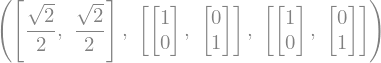

In [15]:
def schmidt_decomp(da,db,Psi):
    scoeff = [] # lista para os coeficientes de Schmidt
    base_a = [] # lista para os autovetores de A
    base_b = [] # lista para os autovetores de B
    P_Psi = proj(Psi)
    A = ptrace(da, db, P_Psi, 'b')
    eig_a = A.eigenvects()
    B = ptrace(da, db, P_Psi, 'a')
    eig_b = B.eigenvects()
    ne = 0
    j = 0
    while ne < da:
        mult = eig_a[j][1] # multiplicidade do autovalor
        ne += mult
        for k in range(0,mult):
            scoeff.append(sqrt(eig_a[j][0]))
            base_a.append(eig_a[j][2][k]/norm(eig_a[j][2][k]))
        j += 1
    ne = 0
    j = 0
    while ne < db:
        mult = eig_b[j][1]
        ne += mult
        for k in range(0,mult):
            base_b.append(eig_b[j][2][k]/norm(eig_b[j][2][k]))
        j += 1
    return scoeff, base_a, base_b
Psi = Matrix([[1/sqrt(2)],[0],[0],[1/sqrt(2)]])
#Psi = Matrix([[1],[0],[0],[0]])
scoeff, base_a, base_b = schmidt_decomp(2,2,Psi)
print('schmidt coefficients, base_a, base_b'); 
scoeff, base_a, base_b

### Implicação importante
Note que 
\begin{equation}
S_{vn}(|\Psi\rangle\langle\Psi|)=0
\end{equation}
e
\begin{equation}
S_{vn}(A)=S_{vn}(B)=-\sum_{j}d_{j}^{2}\log_{2}(d_{j}^{2}).
\end{equation}
Então a única maneira da entropia individual ser nula é se existe um único coeficiente de Schmidt não nulo, e por conseguinte igual a um. Nesse caso teríamos um vetor fatorável: $|\Psi\rangle=|\tilde{\alpha}_{k}\rangle\otimes|\tilde{\beta}_{k}\rangle.$

---
# Exercícios

1. Calcule o produto tensorial $\sigma_{x}\otimes\sigma_{y}=\begin{bmatrix}0&1\\1&0\end{bmatrix}\otimes\begin{bmatrix}0&-i\\i&0\end{bmatrix}$.

1. Uma base ortonormal para $\mathbb{C}^{2\mathrm{x}2}$ é
\begin{equation}
A_{1}=\begin{bmatrix}1&0\\0&0\end{bmatrix}\text{, }A_{2}=\begin{bmatrix}0&1\\0&0\end{bmatrix}\text{, }A_{3}=\begin{bmatrix}0&0\\1&0\end{bmatrix}\text{, }A_{4}=\begin{bmatrix}0&0\\0&1\end{bmatrix}.
\end{equation}
Obtenha uma base ortonormal para $\mathbb{C}^{4\mathrm{x}4}$.

1. Considere $\mathcal{H}_{a}=\mathbb{C}^{d_{a}\mathrm{x}d_{a}}$ e $\mathcal{H}_{b}=\mathbb{C}^{d_{b}\mathrm{x}d_{b}}$ e bases ortonormais, sob o produto interno de Hilbert-Schmidt, $\{A_{j}\}_{j=1}^{d_{a}^{2}}\in\mathcal{H}_{a}$ e $\{B_{k}\}_{k=1}^{d_{b}^{2}}\in\mathcal{H}_{b}$. Defina uma base de $ \mathcal{H}_{ab}=\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ como $\{C_{jk}=A_{j}\otimes B_{k}\}$, com $j=1,\cdots,\dim\mathcal{H}_{a}$ e $k=1,\cdots,\dim\mathcal{H}_{b}$, e verifique que $\langle C_{j,k}|C_{l,m}\rangle_{hs}=\delta_{j,l}\delta_{k,m},$
e portanto que nesse caso também temos $\dim\mathcal{H}_{ab}=(\dim\mathcal{H}_{a})(\dim\mathcal{H}_{b})$.

1. Para o operador de negação, ou de inversão, definido por $A|e_{1}\rangle=|e_{2}\rangle$ e $A|e_{2}\rangle=|e_{1}\rangle$, escreva sua representação produto externo (primeiramente com todos os termos, sejam eles nulos ou não).

1. Obtenha a representação produto externo de $\sigma_{z}\otimes\sigma_{z}$, com $\sigma_{z}\doteq\begin{bmatrix}1&0\\0&-1\end{bmatrix}$ quando representado na base padrão de $\mathbb{C}^{2}$: $\left\{|e_{1}\rangle=\begin{bmatrix}1&0\end{bmatrix}^{T},|e_{2}\rangle=\begin{bmatrix}0&1\end{bmatrix}^{T}\right\}$.

1. Analogamente ao que fizemos nas notas de aula, use o traço parcial para obter a representação produto externo para $C^{b}:=Tr_{a}(C)$.

1. Calcule o traço parcial sobre $\mathcal{H}_{a}$ do projetor no vetor $|\Phi_{+}\rangle=(|e_{1}\rangle\otimes|e_{1}\rangle+|e_{2}\rangle\otimes|e_{2}\rangle)/\sqrt{2}$ (que é um dos estados do tripleto). Calcule também $S_{vn}(P_{\Phi_{+}})$ e $S_{vn}(\mathrm{Tr}_{a}(P_{\Phi_{+}}))$.

1. Prove a decomposição polar direita, i.e., mostre que uma matriz qualquer pode ser escrita como $A=KV$ com $V^{\dagger}=V^{-1}$ e $K=\sqrt{AA^{\dagger}}$.

1. No contexto da decomposição de Schmidt, de forma análoga ao que fizemos nas notas de aula para obter $A:=Tr_{b}(P_{\Psi})$, verifique que $B:=Tr_{a}(P_{\Psi})=\sum_{j=1}d_{j}^{2}|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{j}|$.